In [1]:
%cd '/scratch/sk7898/l3embedding/classifier/sonyc_ust'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
import sklearn
import pandas as pd
from classify import get_file_targets, load_embeddings, construct_mlp_mil, construct_mlp_framewise
from metrics import evaluate_df, parse_ground_truth, parse_coarse_prediction

/scratch/sk7898/l3embedding/classifier/sonyc_ust


Using TensorFlow backend.


In [2]:
version = 'latest' #'v0.4'
only_ann_0 = True
SONYC_PATH = '/scratch/work/sonyc/sonyc/ust/annotations'
EMBS_DIR = '/scratch/sk7898/sonyc_output/embeddings'
DATA_FOLDER = os.path.join('/scratch/sk7898/l3embedding/notebooks/data', version)
taxonomy_path = os.path.join(SONYC_PATH, '{}/dcase-ust-taxonomy.yaml'.format(version))

if version == 'v2.2' or version == 'latest':
    annotation_path = os.path.join(SONYC_PATH, 'latest/annotations_w_test_anns.csv')
else:
    annotation_path = os.path.join(SONYC_PATH, '{}/annotations.csv'.format(version))

annotation_data = pd.read_csv(annotation_path).sort_values('audio_filename')
annotation_data = annotation_data[annotation_data['split'] == 'validate']
if only_ann_0:
    annotation_data = annotation_data[annotation_data['annotator_id'] == 0]
    
with open(taxonomy_path, 'r') as f:
    taxonomy = yaml.load(f, Loader=yaml.Loader)
        
coarse_target_labels = ["_".join([str(k), v]) for k, v in taxonomy['coarse'].items()]
target_labels = [cls[2:] for cls in coarse_target_labels]
coarse_target_list = get_file_targets(annotation_data, coarse_target_labels)

In [3]:
mlp_path = os.path.join(EMBS_DIR, version, 'classifier/sonyc_ust/mlp/melSpec_20200304183233_48000_256_242_2048/0_0/results')
output_path = os.path.join(mlp_path, 'output_mean.csv')

Extra files in prediction table. Using only a subset present in ground truth.


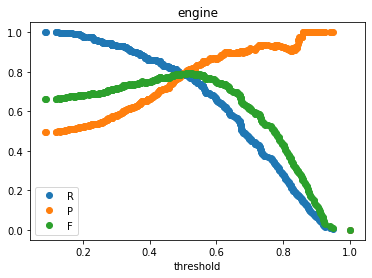

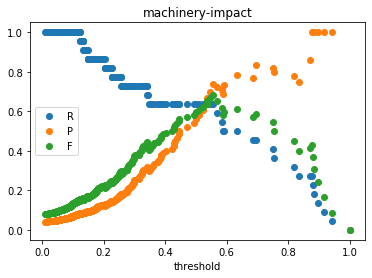

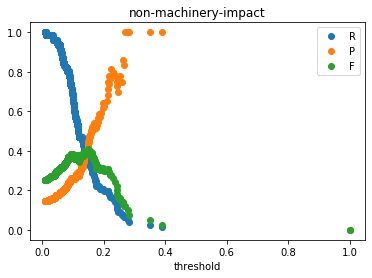

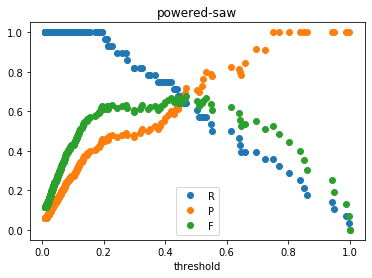

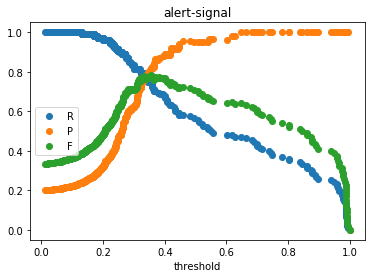

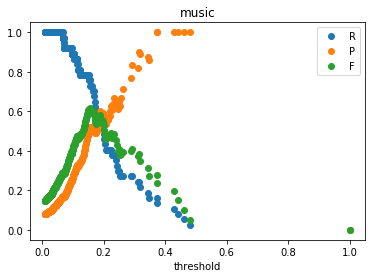

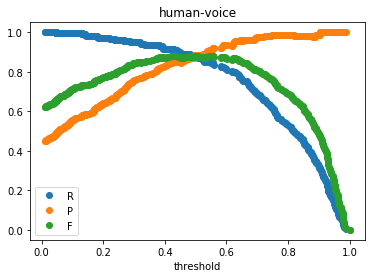

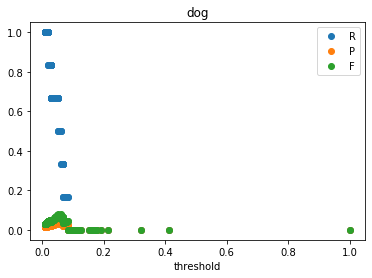

In [4]:
pred_df = parse_coarse_prediction(output_path, taxonomy_path)
gt_df = parse_ground_truth(annotation_path, taxonomy_path)
pred_dict = evaluate_df(gt_df, pred_df, 'coarse', taxonomy)

for cls, cls_df  in pred_dict.items():
    cls_df = cls_df[['threshold', 'R', 'P', 'F']]
    cls_df.plot(x='threshold', style='o')
    plt.title(taxonomy['coarse'][cls])

In [28]:
cls_idx = 8
thres_lower = 0.05
thres_upper = 0.08
df = pred_dict[cls_idx]
res = df[(df['threshold'] > thres_lower) & (df['threshold'] <= thres_upper)]
res

,threshold,TP,FP,FN,P,R,F
42,0.077655,1,41,5,0.023810,0.166667,0.041667
43,0.076367,1,42,5,0.023256,0.166667,0.040816
44,0.073497,1,43,5,0.022727,0.166667,0.040000
45,0.072036,1,44,5,0.022222,0.166667,0.039216
46,0.071610,1,45,5,0.021739,0.166667,0.038462
47,0.071400,1,46,5,0.021277,0.166667,0.037736
48,0.070809,1,47,5,0.020833,0.166667,0.037037
49,0.070579,1,48,5,0.020408,0.166667,0.036364
50,0.069854,1,49,5,0.020000,0.166667,0.035714
51,0.069175,1,50,5,0.019608,0.166667,0.035088
